## 2. Data visualization and Technical Analysis

### 2.1 Loading Data and plotting the changes in 'Close Price'

In [1]:
# Import necessary libraries and load data.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
stock2 = pd.read_csv("C:/Users/pedin/Desktop/Git/ML-Internship-Modules/week2.csv")
stock2.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Day_Perc_Change,Trend
0,2019-10-24,1780.78,1770.78,1787.97,1760.78,5.20,10,2019,0.000000,Slight or No change
1,2019-10-23,1762.17,1761.30,1770.05,1742.00,2.19,10,2019,-0.010450,Slight or No change
2,2019-10-22,1765.73,1788.15,1789.78,1762.00,2.23,10,2019,0.002020,Slight or No change
3,2019-10-21,1785.66,1769.66,1785.88,1765.00,2.22,10,2019,0.011287,Slight or No change
4,2019-10-18,1757.51,1787.80,1793.98,1749.20,3.37,10,2019,-0.015764,Slight or No change


In [2]:
# Inspect the variable types.
stock2.dtypes

Date                      object
Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity    float64
Month                      int64
Year                       int64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [3]:
# Change datatype of 'Date' column.
stock2['Date'] = stock2['Date'].astype('datetime64')
stock2.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity           float64
Month                             int64
Year                              int64
Day_Perc_Change                 float64
Trend                            object
dtype: object

In [4]:
print(stock2['Date'].min())
print(stock2['Date'].max())

2017-10-25 00:00:00
2019-10-24 00:00:00


In [5]:
# Make the 'Date' as index column.
stock2.set_index('Date',inplace=True)
stock2.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,
2019-10-24,1780.78,1770.78,1787.97,1760.78,5.20,10,2019,0.000000,Slight or No change
2019-10-23,1762.17,1761.30,1770.05,1742.00,2.19,10,2019,-0.010450,Slight or No change
2019-10-22,1765.73,1788.15,1789.78,1762.00,2.23,10,2019,0.002020,Slight or No change
2019-10-21,1785.66,1769.66,1785.88,1765.00,2.22,10,2019,0.011287,Slight or No change
2019-10-18,1757.51,1787.80,1793.98,1749.20,3.37,10,2019,-0.015764,Slight or No change


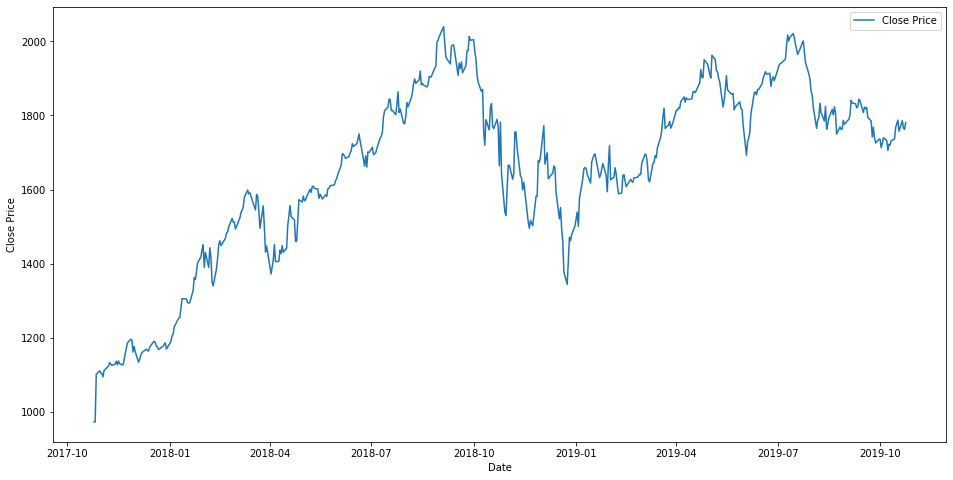

In [6]:
# Plotting the 'Close Price'
plt.figure(figsize=(16,8))
sns.lineplot(stock2.index,stock2['Close Price'],label='Close Price')
plt.show()

From the above plot, we can observe a drastic change during `Jan-2019`.

The stock seemed to `fall` on the same combination of concerns that drove the market down,*`including rising interest rates`*,*`a potential slowdown in the economy`*, and *`worries about trade tensions`* with China.

Reference Link: https://www.fool.com/investing/2019/01/03/why-amazon-stock-lost-11-last-month.aspx

### 2.2 Plotting daily percentage change of stocks.

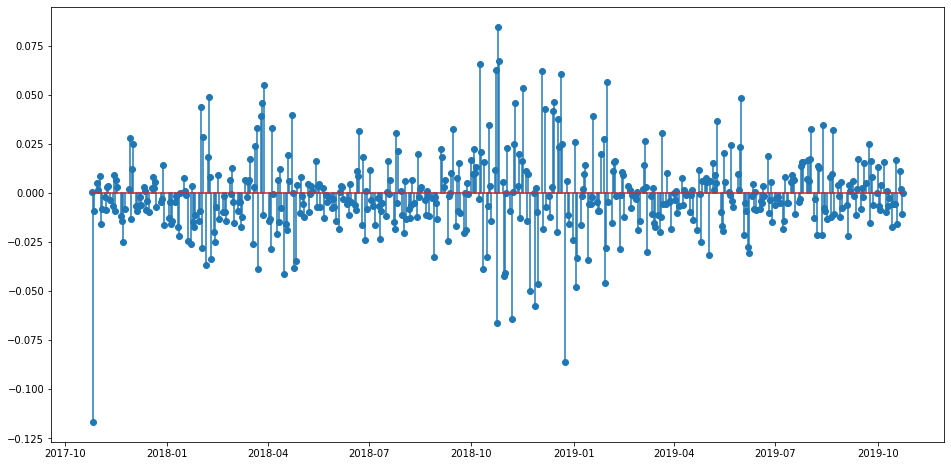

In [7]:
# Stem plot of 'Day_Perc_Change'
plt.figure(figsize=(16,8))
plt.stem(stock2.index,stock2['Day_Perc_Change'])
plt.show()

### 2.3 Analyzing relationship between volume and daily percentage change.

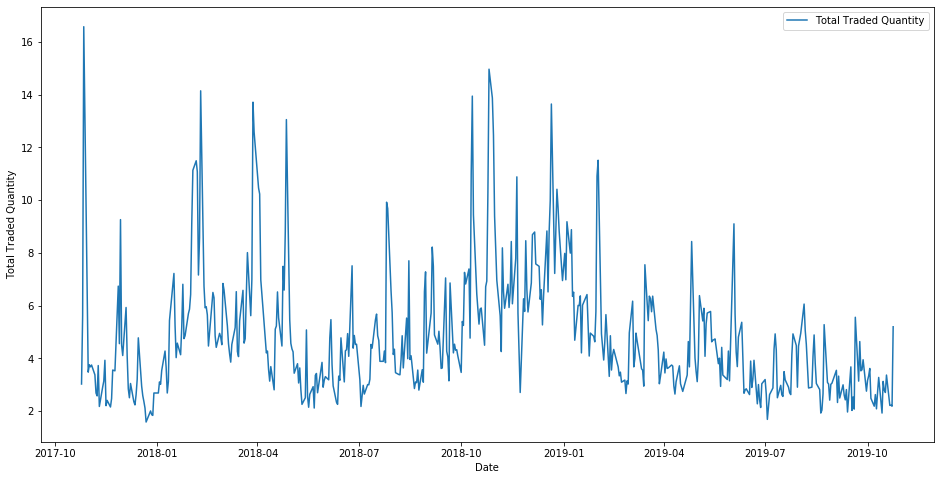

In [8]:
# Plotting Volume.
plt.figure(figsize=(16,8))
sns.lineplot(stock2.index,stock2['Total Traded Quantity'],label='Total Traded Quantity')
plt.show()

**Let's compare volume plot with the stem plot of 'Day_Perc_Change'.**

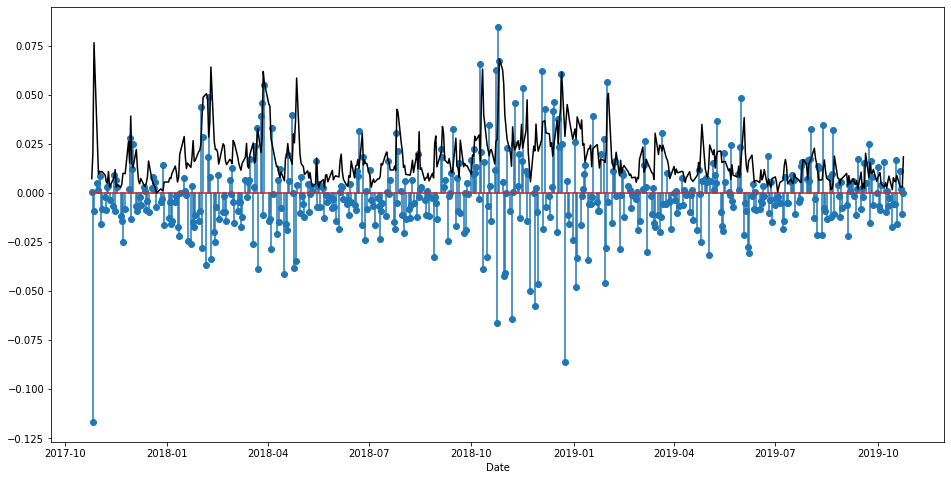

In [9]:
#scaling the 'Total Traded Quantity' in 0-1 range and scaling with max of 'Day_Perc_Change'
scaled = stock2['Total Traded Quantity'] - stock2['Total Traded Quantity'].min()
scaled = scaled/stock2['Total Traded Quantity'].max() * stock2['Day_Perc_Change'].max()


plt.figure(figsize=(16,8))
plt.stem(stock2.index, stock2['Day_Perc_Change'] )#stem plot for 'Day_Perc_Change'
sns.lineplot(stock2.index,scaled, color='k')#line plot for scaled 'Total Traded Quantity
plt.ylabel("")
plt.show()

**Analysis Report:**
 - The `peaks` of the line are clearly reflecting the the `positive` part of stem plot and the `troughs` of the line occuring at the `negative` part of stemplot.
 - By this it is clear that the volume and percentage are `positively correlated`(proportional to each other).
 - There is also inner relation i.e the more the volume, indicate high closing price which inturn return profit percentage.

### 2.4 Plotting pie chart for 'Trend' and bar chart for 'Total Traded Quantity'.

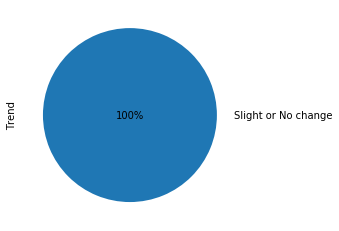

In [10]:
# Pie chart for 'Trend' column.
stock2['Trend'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0, labeldistance=-1.2)
plt.show()

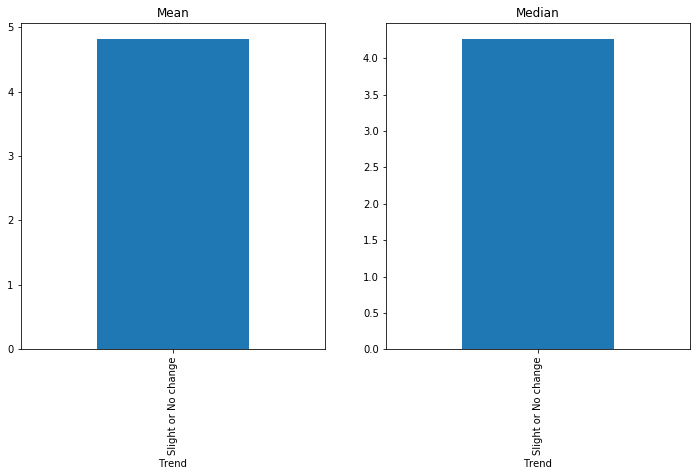

In [11]:
# Bar plot of average and median values of 'Total Traded Quantity' by Trend type.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
stock2.groupby('Trend')['Total Traded Quantity'].mean().plot(kind='bar')
plt.title("Mean")
plt.subplot(1,2,2)
stock2.groupby('Trend')['Total Traded Quantity'].median().plot(kind='bar')
plt.title("Median")
plt.show()

### 2.5 Plot daily distribution percentage as histogram.

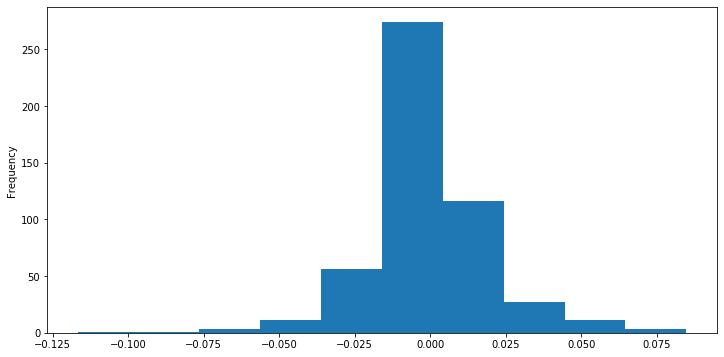

In [12]:
# Histogram for 'Day_Perc_Change'
plt.figure(figsize=(12,6))
stock2['Day_Perc_Change'].plot(kind='hist')
plt.show()

### 2.6 Analyzing how the behaviour of different stocks is correlated.

In [13]:
# Loading data from 5 different stocks.
voltas_df = pd.read_csv(r"D:/Datasets/VOLTAS.csv")
tatapower_df = pd.read_csv(r"D:/Datasets/TATAPOWER.csv")
tatachem_df = pd.read_csv(r"D:/Datasets/TATACHEM.csv")
suntv_df = pd.read_csv(r"D:/Datasets/SUNTV.csv")
idbi_df = pd.read_csv(r"D:/Datasets/IDBI.csv")
print(voltas_df[['Series']].nunique())
print(tatapower_df[['Series']].nunique())
print(tatachem_df[['Series']].nunique())
print(suntv_df[['Series']].nunique())
print(idbi_df[['Series']].nunique())

Series    1
dtype: int64
Series    2
dtype: int64
Series    2
dtype: int64
Series    1
dtype: int64
Series    1
dtype: int64


In [14]:
# Consiering only the rows having 'EQ' in Series column
voltas_df = voltas_df[voltas_df.Series=='EQ']
tatapower_df = tatapower_df[tatapower_df.Series=='EQ']
tatachem_df = tatachem_df[tatachem_df.Series=='EQ']
suntv_df = suntv_df[suntv_df.Series=='EQ']
idbi_df = idbi_df[idbi_df.Series=='EQ']
print(voltas_df[['Series']].nunique())
print(tatapower_df[['Series']].nunique())
print(tatachem_df[['Series']].nunique())
print(suntv_df[['Series']].nunique())
print(idbi_df[['Series']].nunique())


Series    1
dtype: int64
Series    1
dtype: int64
Series    1
dtype: int64
Series    1
dtype: int64
Series    1
dtype: int64


In [15]:
# Creating a single dataframe which contains the 'Closing Price' of each stock.
CP_df = pd.DataFrame()
CP_df['Voltas'] = voltas_df['Close Price']
CP_df['Tatapower'] = tatapower_df['Close Price']
CP_df['Tatachem'] = tatachem_df['Close Price']
CP_df['Suntv'] = suntv_df['Close Price']
CP_df['IDBI'] = idbi_df['Close Price']
CP_df.head()

,Voltas,Tatapower,Tatachem,Suntv,IDBI
0,431.85,83.55,629.80,912.20,75.05
1,432.45,83.85,643.90,894.70,76.65
2,430.20,85.35,638.10,887.05,75.95
3,414.10,83.75,624.90,871.35,69.95
4,415.75,84.15,616.45,852.40,68.75


In [16]:
# Creating a new dataframe which is a percentage change of values of CP_df
PC_df = pd.DataFrame()
PC_df = CP_df.pct_change().fillna(0)
PC_df.dropna(inplace=True)
PC_df.head()

,Voltas,Tatapower,Tatachem,Suntv,IDBI
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001389,0.003591,0.022388,-0.019184,0.021319
2,-0.005203,0.017889,-0.009008,-0.008550,-0.009132
3,-0.037424,-0.018746,-0.020686,-0.017699,-0.078999
4,0.003985,0.004776,-0.013522,-0.021748,-0.017155


In [17]:
# Checking for Nan values
PC_df.isna().sum()

Voltas       0
Tatapower    0
Tatachem     0
Suntv        0
IDBI         0
dtype: int64

In [18]:
# Correlation matrix.
print(PC_df.corr())

             Voltas  Tatapower  Tatachem     Suntv      IDBI
Voltas     1.000000   0.270937  0.052228  0.266606  0.195224
Tatapower  0.270937   1.000000  0.076861  0.273906  0.158601
Tatachem   0.052228   0.076861  1.000000  0.051829  0.090949
Suntv      0.266606   0.273906  0.051829  1.000000  0.204799
IDBI       0.195224   0.158601  0.090949  0.204799  1.000000


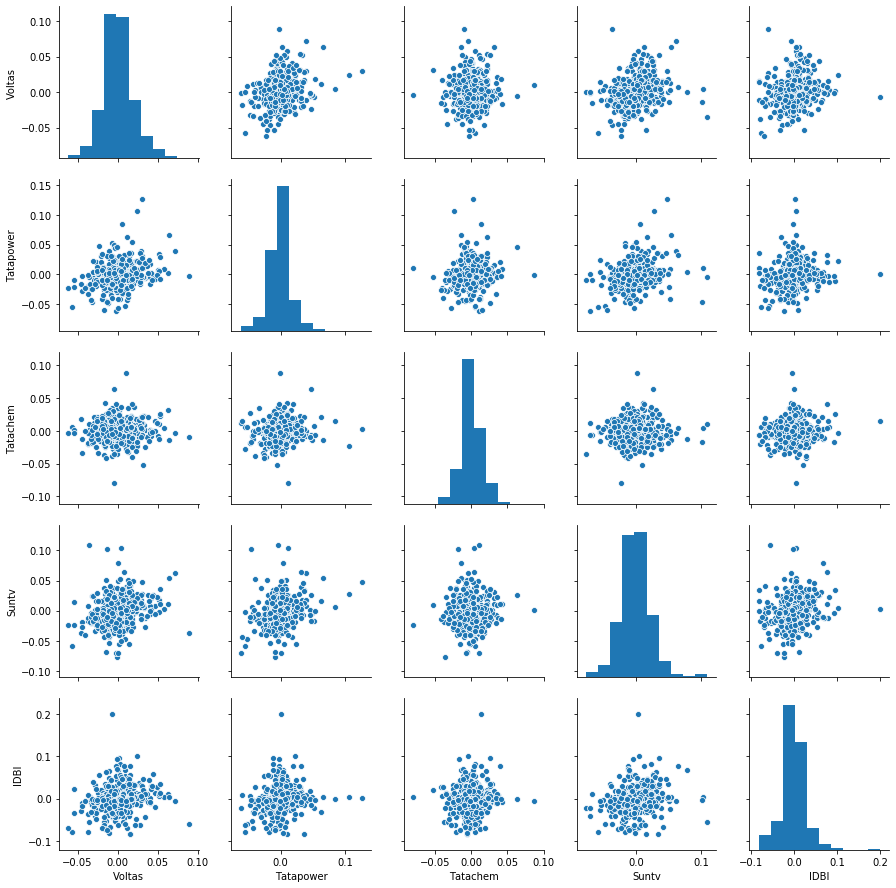

In [19]:
sns.pairplot(PC_df)
plt.show()

### 2.7 Calculating 7 day rolling average.

In [20]:
idbi_df['Date'] = idbi_df['Date'].astype('datetime64')
idbi_df.set_index('Date',inplace=True)

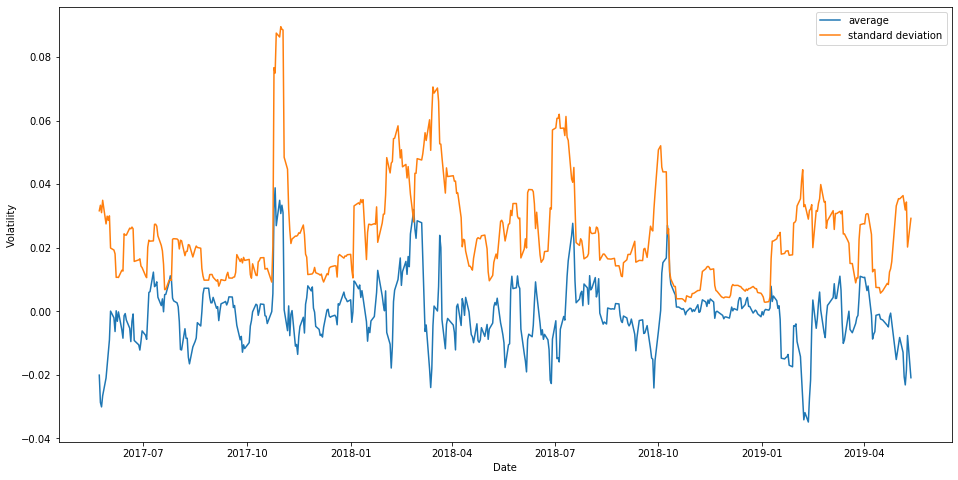

In [21]:
rolling_avg = PC_df['IDBI'].rolling(window=7).mean()# 7-day rolling average.
rolling_std = PC_df['IDBI'].rolling(window=7).std()# standard deviation
plt.figure(figsize=(16,8))
sns.lineplot(idbi_df.index,rolling_avg,label='average')
sns.lineplot(idbi_df.index,rolling_std,label='standard deviation')
plt.ylabel("Volatility")
plt.show()


### 2.8 Calculating the volatility of Nifty50 index.

In [22]:
Nifty50 = pd.read_csv("D:/Datasets/Nifty50.csv")
Nifty50.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


**Comparing the Nifty50 index with the two other stocks.**

In [23]:
Nifty50['Date'] = Nifty50['Date'].astype('datetime64')
Nifty50.set_index('Date',inplace=True)
suntv_df['Date'] = suntv_df['Date'].astype('datetime64')
suntv_df.set_index('Date',inplace=True)

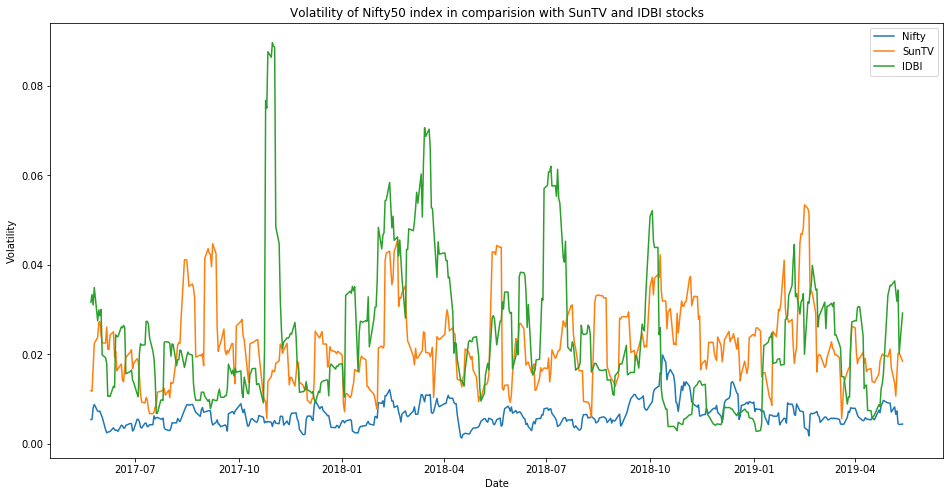

In [24]:
nifty_avg = Nifty50['Close'].pct_change().fillna(0).rolling(window=7).std()
suntv_avg = PC_df['Suntv'].rolling(window=7).std()
idbi_avg  = PC_df['IDBI'].rolling(window=7).std()
plt.figure(figsize=(16,8))
sns.lineplot(Nifty50.index,nifty_avg,label='Nifty')
sns.lineplot(suntv_df.index,suntv_avg,label='SunTV')
sns.lineplot(idbi_df.index,idbi_avg,label='IDBI')
plt.title("Volatility of Nifty50 index in comparision with SunTV and IDBI stocks")
plt.ylabel("Volatility")
plt.show()

### 2.9 Trade calls - Using Simple Moving Averages.

In [25]:
short_window = 21
long_window = 34
signals = pd.DataFrame(index=idbi_df.index)
signals['signal'] = 0.0
signals['short_sma'] = idbi_df['Close Price'].rolling(window=short_window,min_periods=1,center=False).mean()
signals['long_sma'] = idbi_df['Close Price'].rolling(window=long_window,min_periods=1,center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_sma'][short_window:] > signals['long_sma'][short_window:],1.0,0.0)
signals['positions'] = signals['signal'].diff()
signals

,signal,short_sma,long_sma,positions
Date,,,,
2017-05-15,0.0,75.050000,75.050000,NaN
2017-05-16,0.0,75.850000,75.850000,0.0
2017-05-17,0.0,75.883333,75.883333,0.0
2017-05-18,0.0,74.400000,74.400000,0.0
2017-05-19,0.0,73.270000,73.270000,0.0
...,...,...,...,...
2019-05-07,0.0,42.588095,43.017647,0.0
2019-05-08,0.0,42.238095,42.842647,0.0
2019-05-09,0.0,41.914286,42.685294,0.0


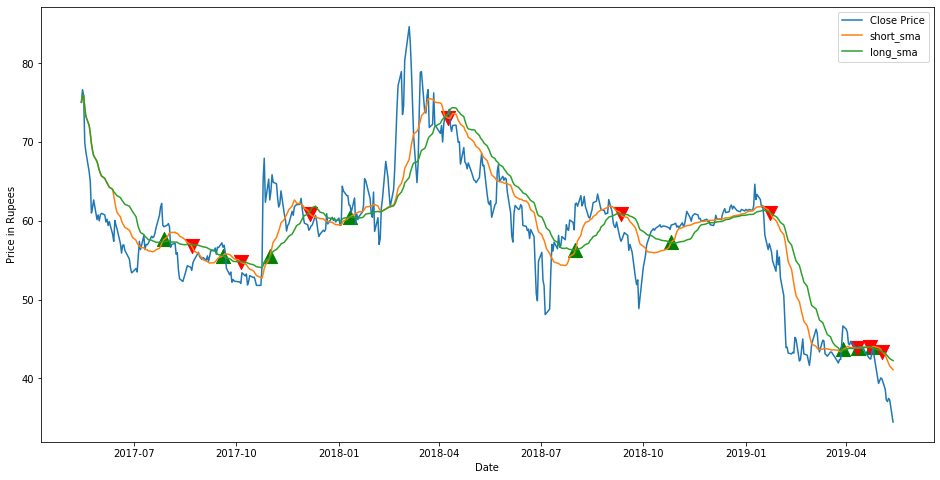

In [26]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(signals.index,idbi_df['Close Price'],label = 'Close Price')
sns.lineplot(signals.index,signals['short_sma'],label = 'short_sma')
sns.lineplot(signals.index,signals['long_sma'],label = 'long_sma')
plt.scatter(signals.index[signals.positions==1.0],signals.short_sma[signals.positions==1.0],s=200,color='g',marker='^')
plt.scatter(signals.index[signals.positions==-1.0],signals.short_sma[signals.positions==-1.0],s=200,color='r',marker='v')
plt.ylabel("Price in Rupees")
plt.show()

### 2.10 Trade calls - Using Bollinger bands.

In [27]:
idbi_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,IDBI,EQ,75.50,75.70,76.10,73.15,75.25,75.05,74.58,6688622,4.988258e+08,16062,1486475,22.22
2017-05-16,IDBI,EQ,75.05,75.30,77.75,73.85,77.05,76.65,75.38,8740098,6.587996e+08,24319,2578070,29.50
2017-05-17,IDBI,EQ,76.65,76.65,77.30,75.60,75.75,75.95,76.37,3152912,2.407824e+08,11386,643174,20.40
2017-05-18,IDBI,EQ,75.95,75.00,75.50,69.05,69.05,69.95,71.46,15086266,1.078020e+09,36259,2852529,18.91
2017-05-19,IDBI,EQ,69.95,69.00,70.95,68.50,68.70,68.75,69.42,10966153,7.612893e+08,39512,1949156,17.77


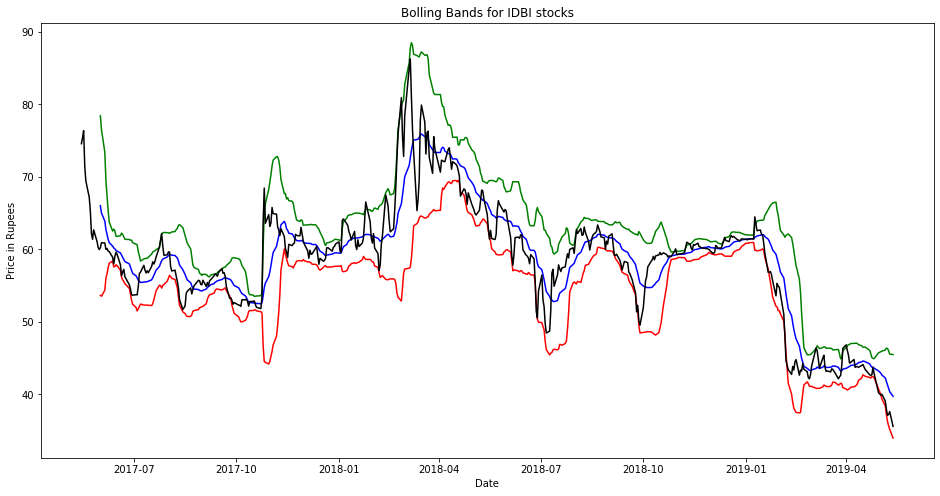

In [28]:
rolling_mean = idbi_df['Close Price'].rolling(14).mean()
rolling_std = idbi_df['Close Price'].rolling(14).std()

upper_band = rolling_mean + 2*rolling_std
lower_band = rolling_mean - 2*rolling_std

plt.figure(figsize=(16,8))
sns.lineplot(idbi_df.index,rolling_mean,color='b')
sns.lineplot(idbi_df.index,upper_band,color='g')
sns.lineplot(idbi_df.index,lower_band,color='r')
sns.lineplot(idbi_df.index,idbi_df['Average Price'],color='k')
plt.title("Bolling Bands for IDBI stocks")
plt.ylabel("Price in Rupees")
plt.show()

In [29]:
IDBI_BB_df = pd.DataFrame(index=idbi_df.index)
IDBI_BB_df['14-day rolling mean'] = pd.Series(rolling_mean)
IDBI_BB_df['upper_band'] = pd.Series(upper_band)
IDBI_BB_df['lower_band'] = pd.Series(lower_band)
IDBI_BB_df['Average Daily Price'] = idbi_df['Average Price']
IDBI_BB_df

,14-day rolling mean,upper_band,lower_band,Average Daily Price
Date,,,,
2017-05-15,NaN,NaN,NaN,74.58
2017-05-16,NaN,NaN,NaN,75.38
2017-05-17,NaN,NaN,NaN,76.37
2017-05-18,NaN,NaN,NaN,71.46
2017-05-19,NaN,NaN,NaN,69.42
...,...,...,...,...
2019-05-07,41.803571,46.373787,37.233356,37.99
2019-05-08,41.307143,46.336420,36.277866,37.11
2019-05-09,40.842857,46.019113,35.666601,37.22


In [30]:
IDBI_BB_df.to_csv("IDBI_BB")